The Basic Hubbard plots are plots are programmed to match plots in J. Phys.: Condens. Matter 27 (2015) 393001
The Thermal Hubbard plots are programmed to match the plots in Phys rev B. 93 245131 (2016)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import basic_hub as hub
import HF_hub as HFhub
import KS_hub as KShub
import Thermal_Hubbard as Therm
import Thermal_KS_Hubbard as KS_Therm
from numpy.linalg import eigh
import scipy.optimize as optimize
from scipy.integrate import simps
import Near_U_hub as near

# Hubbard Dimer

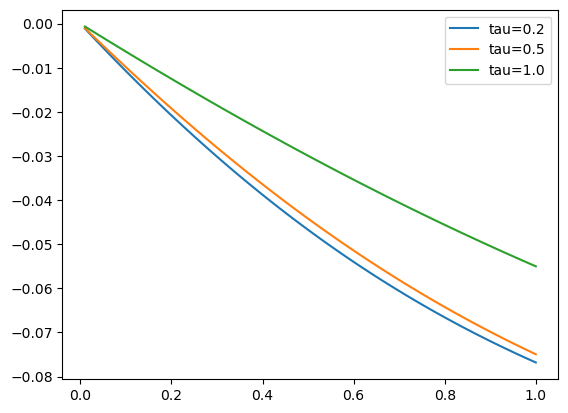

-0.04193140743264138

In [2]:
thermal_lams = np.linspace(0.01,1,100)
taus = np.array([.2,.5,1])
Ucs = np.empty((len(taus),len(thermal_lams)))
U = 1
t = .5
target_dn = 1
EHX = (U/2)*(1+(target_dn/2)**2)

for i, tau in enumerate(taus):
    dv_guess = -float(KS_Therm.find_dvks(t,[tau],[target_dn]))
    for j, lam in enumerate(thermal_lams):
        Ucs[i,j],dv_guess = Therm.Thermal_hub_Uc(t,lam,U,tau,target_dn,EHX,dv_guess)
        
for i in range(len(taus)):
    plt.plot(thermal_lams,Ucs[i,:],label='tau='+str(taus[i]))
plt.legend()
plt.show()

simps(Ucs[1,:],thermal_lams)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
0.05773502691896258


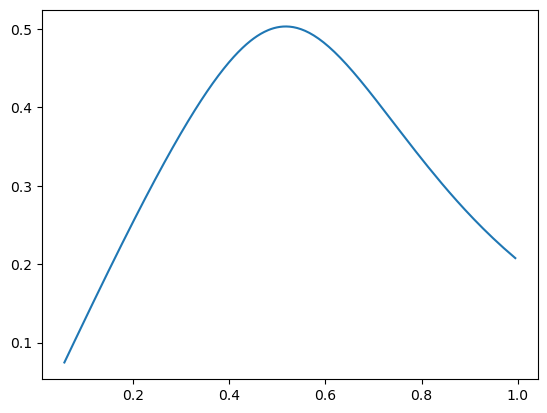

EDC: 0.3288273498333382
0.05000000002172621
[-1.00141842]
[-0.00730471]
[-0.62989578]
[-0.62311735]


In [9]:
t = .5
U = 1
tau = .1
target_dn = .1
EHX = (U/2)*(1+(target_dn/2)**2)
lambdas = np.linspace(.01,300,6000)
dlam = lambdas[1]-lambdas[0]

dv_guess = -float(KS_Therm.find_dvks(t,[tau],[target_dn]))

Wintlams = np.empty(len(lambdas))
Kcs = []
mus = np.empty(len(lambdas))
plotmus = []

for i,lam in enumerate(lambdas):
    mus[i] = np.sqrt(1/lam)
    if i%100==0:
        print(i)
    Wintlams[i],dv_guess = Therm.Thermal_hub_Uc(t,lam,U,tau,target_dn,EHX,dv_guess)
    if mus[i] <= 1:
        Kcs.append((2*mus[i]*simps(Wintlams[:i]-Wintlams[i],lambdas[:i])))
        plotmus.append(mus[i])
print(np.sqrt(1/lam))

plt.plot(plotmus,Kcs)
plt.show()

EDC = -simps(Kcs,plotmus)
print('EDC:',EDC)

##################### calc refrence properties#######################

lam = 100000
func = hub.dn_search_func_gen(lam*U,t,target_dn)
dv = optimize.bisect(func,-100000000000,100000000000)
eiglam,veclam = hub.hub_2site(lam*U,t,dv)

Vee_op = hub.hub_int_operator(U)
VSC = np.dot(veclam.T,np.dot(Vee_op,veclam))
print(VSC)

delta_vks = KS_Therm.find_dvks(t,[tau],[target_dn])
Ttaus = KS_Therm.Ts(t,tau,delta_vks)
Ss = KS_Therm.entropy(delta_vks,t,tau)
print(Ttaus-tau*Ss)

lam = 1
func = Therm.Thermal_dn_search_func_gen(lam*U,t,tau,target_dn)
dv = optimize.bisect(func,-100,100,xtol=2e-12)
Vext = Therm.Expectation(U,t,dv/2,-dv/2,U/2,[tau],operator='ext_potential')
print(Vext)

print(EDC+VSC+Vext+(Ttaus-tau*Ss))

############### calc exact energy #############################
_,_,A = Therm.Thermal_2particle_Hubbard(U,t,dv,[tau])
print(A)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


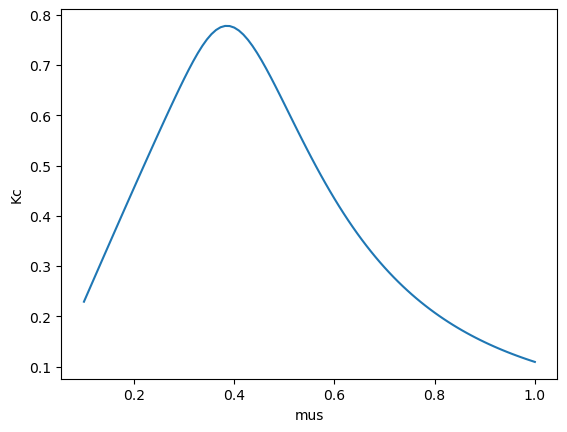

2*Tc= 0.1094063998467429
2*Winf= 0.22921112846368966
ADC= 0.38043267947884096


In [5]:
t = .5
U = 1
tau = 1
target_dn = .1
mus = np.linspace(.1,1,100)

lammus = 1/mus**2

colors = ['blue','red','purple','black','green']
linestyles = ['--','-']
all_lines = []

EHX = (U/2)*(1+(target_dn/2)**2)


Kcs = []
for k,mu in enumerate(mus):
    print(k)
    dv_guess = -float(KS_Therm.find_dvks(t,[tau],[target_dn]))
    if k%100==0:
        print(k)
    intlams = np.linspace(0.01,lammus[k],300)
    
    Wintlams = np.empty(len(intlams))
    for i, lam in enumerate(intlams):

        Wintlams[i],dv_guess = Therm.Thermal_hub_Uc(t,lam,U,tau,target_dn,EHX,dv_guess)
    
    Kcs.append((2*mu*simps(Wintlams-Wintlams[-1],intlams)))
            
plt.plot(mus,Kcs)

EDC = simps(Kcs,mus)
plt.xlabel('mus')
plt.ylabel('Kc')
plt.show()
print('2*Tc=',Kcs[-1])
print('2*Winf=',Kcs[0])
print('ADC=',EDC)

In [11]:
lam = 100000
func = hub.dn_search_func_gen(lam*U,t,target_dn)
dv = optimize.bisect(func,-100000000000,100000000000)
eiglam,veclam = hub.hub_2site(lam*U,t,dv)

Vee_op = hub.hub_int_operator(U)
VSC = np.dot(veclam.T,np.dot(Vee_op,veclam))
print(VSC)

delta_vks = KS_Therm.find_dvks(t,[tau],[target_dn])
Ttaus = KS_Therm.Ts(t,tau,delta_vks)
Ss = KS_Therm.entropy(delta_vks,t,tau)
print(Ttaus-tau*Ss)

lam = 1
func = Therm.Thermal_dn_search_func_gen(lam*U,t,tau,target_dn)
dv = optimize.bisect(func,-100,100,xtol=2e-12)
Vext = Therm.Expectation(U,t,dv/2,-dv/2,U/2,[tau],operator='ext_potential')
print(Vext)

print(EDC+VSC+Vext+(Ttaus-tau*Ss))

############### calc exact energy #############################
_,_,A = Therm.Thermal_2particle_Hubbard(U,t,dv,[tau])
print(A)

0.05000000002172621
[-2.89120205]
[-0.01340578]
[-2.56507133]
[-2.46018231]


## Basic figures

In [3]:
target_dn = 0
externaldv = 20
U = 100
t = .5
n1_op,n2_op = hub.hub_dens_ops()

func = hub.dn_search_func_gen(0,t,target_dn)
exactdvs = optimize.bisect(func,-10000000000000,100000000000000,xtol=2e-12)
#print('what the exact dvs should be:',exactdvs)
#print('exact dvxc:',exactdvs-externaldv)
#print()

val, vec = hub.hub_2site(0,t,exactdvs)
    
n1 = np.dot(vec,np.dot(n1_op,vec))
n2 = np.dot(vec,np.dot(n2_op,vec))
#print('calc dn:',n2-n1)
#print()


conv = 10
iters = 0

dn = 0

while conv > .001:
    
    dvs = hub.dvs(externaldv,dn,U)
    #print('calc dvs:',dvs)
    #print('calc vxc:',dvs-externaldv)
    
    val, vec = hub.hub_2site(0,t,dvs)
    
    n1 = np.dot(vec,np.dot(n1_op,vec))
    n2 = np.dot(vec,np.dot(n2_op,vec))
    #print('calc dn:',n2-n1)
    
    #print()
    
    dn = n2-n1
    
    iters+=1
    if iters > 100:
        break

1.5096309604660352


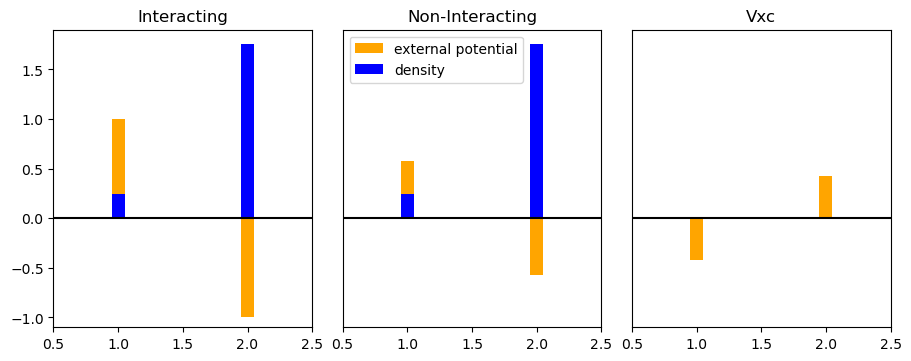

In [4]:
externaldv = 2
U = 1
t = .5
n1_op,n2_op = hub.hub_dens_ops()

groundval,groundvec = hub.hub_2site(U,t,externaldv)

groundn1 = np.dot(groundvec,np.dot(n1_op,groundvec))
groundn2 = np.dot(groundvec,np.dot(n2_op,groundvec))

target_dn = groundn2-groundn1

func = hub.dn_search_func_gen(0,t,target_dn)
exactdvs = optimize.bisect(func,-100,100,xtol=2e-12)
#print('what the exact dvs should be:',exactdvs)
#print('exact dvxc:',exactdvs-externaldv)
#print()

val, vec = hub.hub_2site(0,t,exactdvs)
    
n1 = np.dot(vec,np.dot(n1_op,vec))
n2 = np.dot(vec,np.dot(n2_op,vec))

print(n2-n1)

x = np.array([1,2])
ns = np.array([n1,n2])
vs = np.array([externaldv/2,-externaldv/2])
vss = np.array([exactdvs/2,-exactdvs/2])

fig, axs = plt.subplots(1,3,figsize=(9,3.5),layout='constrained')


axs[0].bar(x,vs,width=.1,label='external potential',color='orange')
axs[0].bar(x,ns,width=.1,label='density',color='blue')
axs[0].plot([-1,4],[0,0],color='black')
axs[0].set_xlim((.5,2.5))
axs[0].set_ylim((-1.1,1.9))
axs[0].set_title('Interacting')

axs[1].bar(x,vss,width=.1,label='external potential',color='orange')
axs[1].bar(x,ns,width=.1,label='density',color='blue')
axs[1].plot([-1,4],[0,0],color='black')
axs[1].set_xlim((.5,2.5))
axs[1].set_ylim((-1.1,1.9))
axs[1].set_yticks([])
axs[1].set_title('Non-Interacting')
axs[1].legend()

axs[2].bar(x,vss-vs,width=.1,color='orange')
axs[2].plot([-1,4],[0,0],color='black')
axs[2].set_xlim((.5,2.5))
axs[2].set_ylim((-1.1,1.9))
axs[2].set_title('Vxc')
axs[2].set_yticks([])

plt.savefig('Hubbard Example U1 t.5 dv2.png')
plt.show()

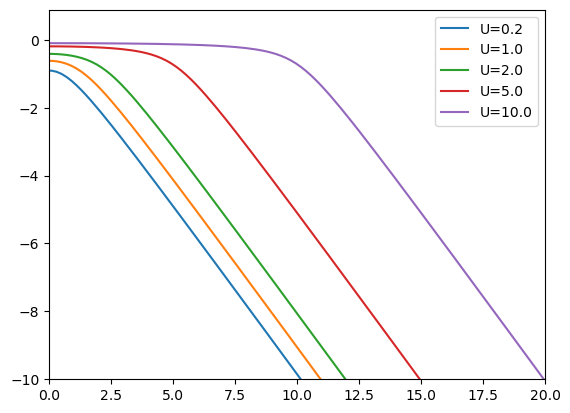

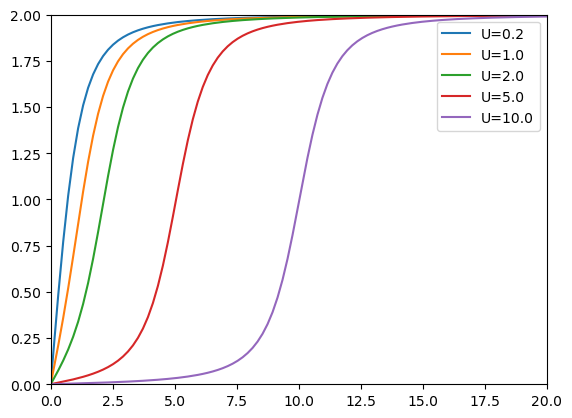

In [5]:
dvs = np.linspace(-20,20,200)
Us = np.array([.2,1,2,5,10])

ndv = len(dvs)
nU = len(Us)

[eigs,vecs] = hub.hub_2site_Udv(Us,1/2,dvs)

for i,U in enumerate(Us):
    plt.plot(dvs,eigs[:,i],label='U='+str(U))
plt.ylim(bottom=-10)
plt.xlim((0,20))
plt.legend()
plt.show()

[n1,n2] = hub.hub_dens_ops()
occ1_nums = np.empty((ndv,nU))
occ2_nums = np.empty((ndv,nU))

for i in range(nU):
    for j in range(ndv):
        occ1_nums[j,i] = np.dot(vecs[i,:,j],np.dot(n1,vecs[i,:,j]))
        occ2_nums[j,i] = np.dot(vecs[i,:,j],np.dot(n2,vecs[i,:,j]))
    plt.plot(dvs,occ2_nums[:,i]-occ1_nums[:,i],label='U='+str(Us[i]))
plt.xlim(0,20)
plt.ylim(0,2)
plt.legend()
plt.show()

## Fig 7

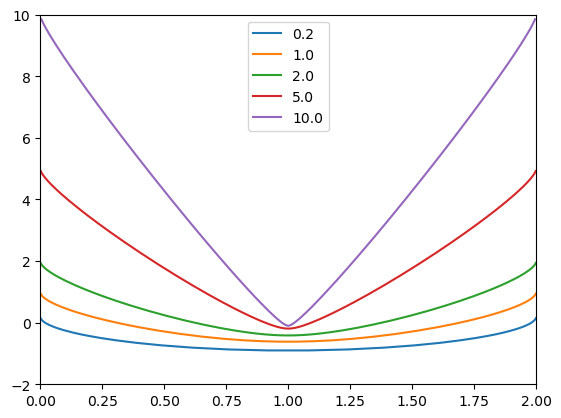

In [6]:
Vs = np.empty((ndv,nU))

for i in range(nU):
    for j,dv in enumerate(dvs):
        v = hub.hub_pot_operator(dv)
        Vs[j,i] = np.dot(vecs[i,:,j],np.dot(v,vecs[i,:,j]))

F = eigs-Vs

for i in range(nU):
    plt.plot(occ1_nums[:,i],F[:,i],label=Us[i])
plt.xlim(0,2)
plt.ylim(-2,10)
plt.legend()
plt.show()

## Fig 8

can't calculate these from eigenvectors?

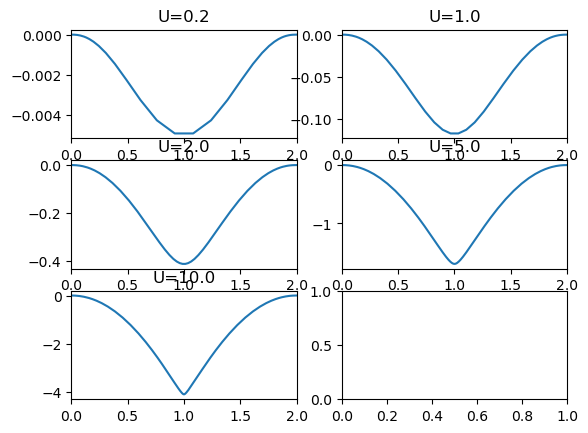

In [7]:
Us = np.array([.2,1,2,5,10])
Nu = len(Us)

Vees = np.empty((ndv,nU))
Ecs = np.empty((ndv,nU))
diff = np.empty(ndv)
fig, axs = plt.subplots(3,2)

Ts = hub.hub_non_int_kin_operator(.5)

r = 0
c = 0
for i,U in enumerate(Us):
    if c == 2:
        r += 1
        c = 0
    for j,dv in enumerate(dvs):
        
        val_T = Ts(vecs[i,:,j])
        
        test_val_T = hub.Ts(occ1_nums[j,i])
        
        VHX = hub.hub_EHX_operator(U)

        val_EHX = np.dot(vecs[i,:,j],np.dot(VHX,vecs[i,:,j]))

        test_val_EHX = hub.E_HX(occ1_nums[j,i],U)

        Ecs[j,i] = F[j,i] - test_val_EHX - test_val_T

    axs[r,c].plot(occ1_nums[:,i],Ecs[:,i],label='U='+str(U))
    axs[r,c].set_title('U='+str(U))
    axs[r,c].set_xlim(0,2)
    c += 1
plt.show()

## Fig 21

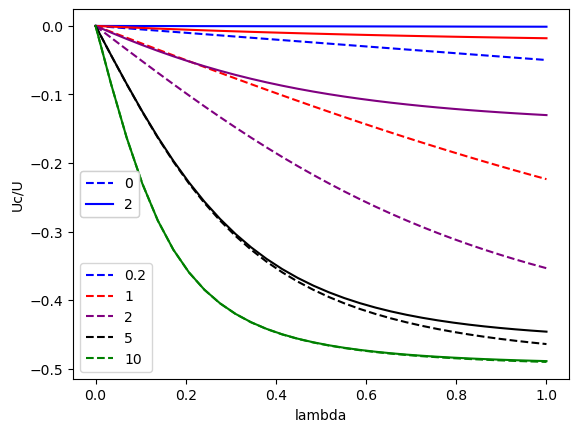

In [8]:
t = .5
Us = [.2,1,2,5,10]
dvs = [0,2]
lams = np.linspace(0.00001,1,30)
    
Ucs = hub.hub_Uc_lams_Us_dvs_overU(t,lams,Us,dvs)

colors = ['blue','red','purple','black','green']
linestyles = ['--','-']
all_lines = []
for i,v in enumerate(dvs):
    lines = []
    for j,U in enumerate(Us):
        l, = plt.plot(lams,Ucs[i,:,j],color=colors[j],linestyle=linestyles[i])
        lines.append(l)
    all_lines.append(lines)

legend1 = plt.legend(all_lines[0],Us,loc='lower left')
plt.gca().add_artist(legend1)
legend2 = plt.legend([l[0] for l in all_lines],dvs,loc=6)
plt.gca().add_artist(legend2)
plt.xlabel('lambda')
plt.ylabel('Uc/U')
plt.show()

# Thermal Hubbard Dimer

## Fig 1 exact 

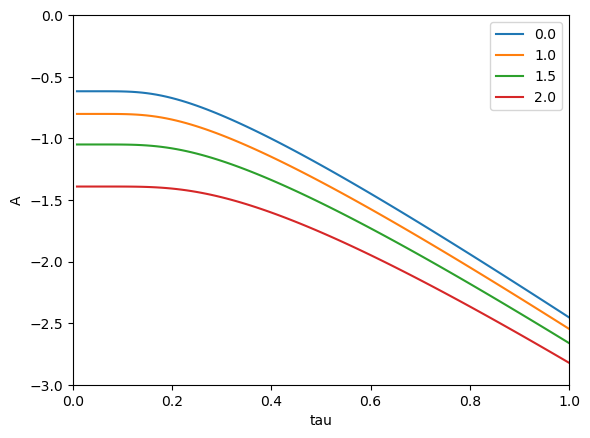

In [9]:
U = 1
t = 1/2
dvs = np.array([0,1,1.5,2])
taus = np.linspace(.008,1,100)
Zgs,Oms,As = Therm.Thermal_2particle_Hubbard_dvs(U,t,dvs,taus)
for i,dv in enumerate(dvs):
    plt.plot(taus,As[:,i],label=dv)
plt.xlim(0,1)
plt.ylim(-3,0)
plt.xlabel('tau')
plt.ylabel('A')
plt.legend()
plt.show()

## Fig 2

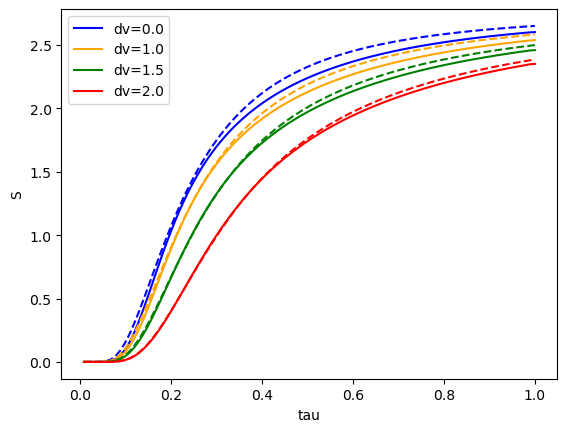

In [10]:
U = 1
t = 1/2
dvs = np.array([0,1,1.5,2])
taus = np.linspace(.008,1,100)

Zgs,Oms,As = Therm.Thermal_2particle_Hubbard_dvs(U,t,dvs,taus)

colors = ['blue','orange','green','red']

delta_ns = Therm.Thermal_2particle_Hubbard_deltan_dvs(U,t,dvs,taus)

delta_vks = np.empty((len(taus),len(dvs)))

for i in range(len(dvs)):
    delta_vks[:,i] = KS_Therm.find_dvks(.5,taus,delta_ns[:,i])
    Ss = KS_Therm.entropy(delta_vks[:,i],t,taus)
    plt.plot(taus,Ss,linestyle='--',color=colors[i])
    plt.plot(taus,-np.gradient(Oms[:,i],taus),label='dv='+str(dvs[i]),color=colors[i])
plt.xlabel('tau')
plt.ylabel('S')
plt.legend()
plt.show()

## Fig 3 exact

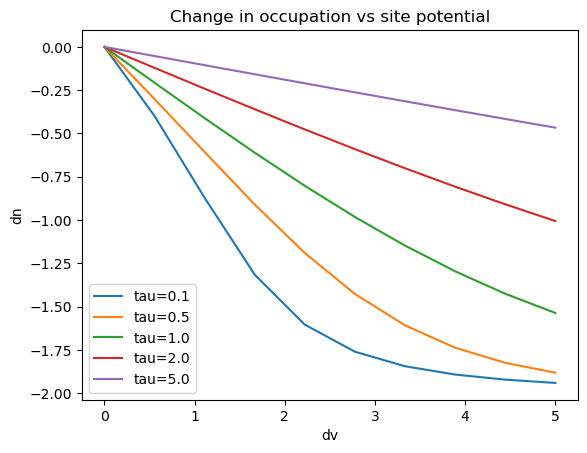

In [11]:
U = 1
t = 1/2
dvs = np.linspace(0,5,10)
v1s = dvs/2
taus = np.array([.1,.5,1,2,5])
delta_n = Therm.Thermal_2particle_Hubbard_deltan_dvs(U,t,dvs,taus)
for i,tau in enumerate(taus):
    plt.plot(dvs,delta_n[i,:],label='tau='+str(tau))
plt.legend()
plt.xlabel('dv')
plt.ylabel('dn')
plt.title('Change in occupation vs site potential')
plt.savefig('Thermal interacting hubbard dimer.png')
plt.show()

v1 is dv/2 and v2 is -dv/2. Then dn is defined as n1-n2. For dn to be negative means that the occupation
is moving towards site two. This plot makes sense because as dv increases v1 increases pushing occupation to 
sit two. flipping the plot returns the exact plot in the paper. I think there was a mis labeling of dn or dv somewhere.

## Fig 4

In [12]:
ttaus = [.08,.5,1,2,4]
taulist = np.array([])
dtau = 1e-4
steps = np.arange(7)
nsteps = np.flip(steps)
tauis = np.array([])

for i,tau in enumerate(ttaus):
    for j in nsteps:
        taulist = np.append(taulist,tau-j*dtau)
        if j == 6:
            tauis = np.append(tauis,j*(i+1)+(i*7))
    for j in steps[1:]:
        taulist = np.append(taulist,tau+j*dtau)
        
tauis = tauis.astype(int)

In [13]:
U = 1
t = 1/2
dvs = np.linspace(-40,10,300)
#taus = np.array([.1,.5,1,2,4])
taus = taulist
ntau = len(taus)
ndv = len(dvs)

Zgs,Oms,As = Therm.Thermal_2particle_Hubbard_dvs(U,t,dvs,taus)

delta_ns = Therm.Thermal_2particle_Hubbard_deltan_dvs(U,t,dvs,taus)

delta_vks = np.empty((len(taus),len(dvs)))

S = np.empty((ntau,ndv))
Ss = np.empty((ntau,ndv))

for i in range(len(dvs)):
    delta_vks[:,i] = KS_Therm.find_dvks(.5,taus,delta_ns[:,i])
    Ss[:,i] = KS_Therm.entropy(delta_vks[:,i],t,taus)
    S[:,i] = -np.gradient(Oms[:,i],taus)

Vee = Therm.Thermal_2particle_Hubbard_interaction_dvs(U,t,dvs,taus)
EHX = KS_Therm.UHX(U,delta_ns)
Ttau = Therm.Thermal_2particle_Hubbard_kinetic_dvs(U,t,dvs,taus)

Ttaus = np.empty(delta_vks.shape)
for i in range(ntau):
    Ttaus[i,:] = KS_Therm.Ts(t,taus[i],delta_vks[i,:])

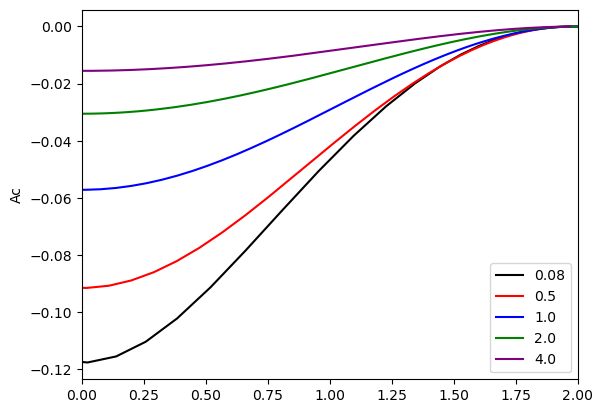

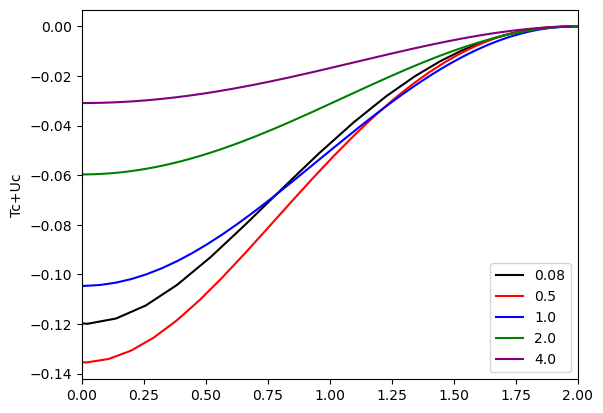

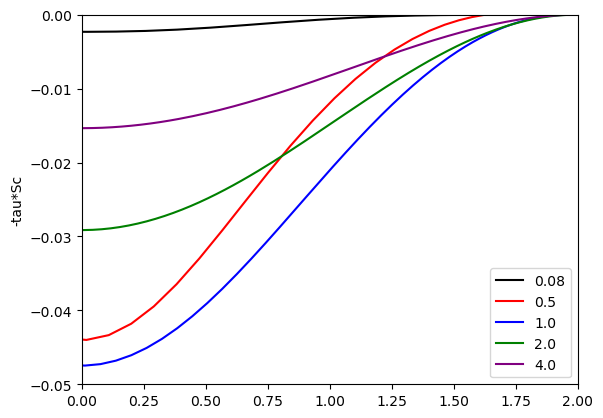

In [14]:
#iss = [0,int(ntau/8),int(ntau/4),int(ntau/2),ntau-1]
colors = ['black','red','blue','green','purple']

j=0
for i in tauis:
    plt.plot(delta_ns[i,:],(Ttau[i,:]-Ttaus[i,:])+(Vee[i,:]-EHX[i,:])-taus[i]*(S[i,:]-Ss[i,:]),label=taus[i],color=colors[j])
    j+=1
plt.legend()
plt.xlim(0,2)
plt.ylabel('Ac')
plt.show()

j=0
for i in tauis:
    plt.plot(delta_ns[i,:],(Ttau[i,:]-Ttaus[i,:])+(Vee[i,:]-EHX[i,:]),label=taus[i],color=colors[j])
    j+=1
plt.legend()
plt.xlim(0,2)
plt.ylabel('Tc+Uc')
plt.show()

j=0
for i in tauis:
    plt.plot(delta_ns[i,:],taus[i]*(S[i,:]-Ss[i,:]),label=taus[i],color=colors[j])
    j+=1
plt.legend()
plt.xlim(0,2)
plt.ylabel('-tau*Sc')
plt.ylim(-.05,0)
plt.show()

## Scratch Paper

In [15]:
def hub_Uc(t,lam,U,target_dn,EHX):
    '''
    Takes multiple values and comutes Uc at a target delta n for those values.
    
    INPUT
        t: scalar
            The hopping parameter.
        lam: scalar
            the interaction strength scaling paramter.
        U: scalar
            The interaction strength of the full system.
        target_dn: scalar
            the on-site occupation differnece that is to remain fixed.
        E_HX: scalar
            The Hartree Exchange energy of the non-interacting system at the 
            targert delta n.
    
    OUTPUT
        Uc: scalar
            The potnetial correlation energy at given values above.
            
    '''
    func = dn_search_func_gen(lam*U,t,target_dn)
    dv = optimize.bisect(func,-10,10,xtol=2e-12)
        
    Vee_op = hub_int_operator(lam*U)
        
    eig, vec = hub_2site(lam*U,t,dv)
        
    return (np.dot(vec.T,np.dot(Vee_op,vec))-lam*EHX)/lam

def hub_Uc_lams(t,lams,U,target_dn,EHX):
    Ucs = np.empty(len(lams))
    for i,lam in enumerate(lams):
        Ucs[i] = hub_Uc(t,lam,U,target_dn,EHX)
    return Ucs

def hub_Uc_lams_Us_dvs(t,lams,Us,dvs):
    
    n1,n2 = hub_dens_ops()
    
    ab_eigs, ab_vecs = hub_2site_Udv(Us,t,dvs)

    Ucs = np.empty((len(dvs),len(lams),len(Us)))

    for i,U in enumerate(Us):
        for j,dv in enumerate(dvs):
    
            occ1 = np.dot(ab_vecs[i,:,j].T,np.dot(n1,ab_vecs[i,:,j]))
            target_dn = (2-occ1)-occ1
    
            EHX = E_HX(occ1,U)
    
            Ucs[j,:,i] = hub_Uc_lams(t,lams,U,target_dn,EHX)/U
        
    return Ucs

In [16]:
t = 1
Us = [1]
dns = [.1]
lams = np.linspace(0.00001,1,10000)

for i,dn in enumerate(dns):
    n1 = 1+dn/2
    EH = hub.E_H(n1,U)
    for j,U in enumerate(Us):
        Uxcs = hub.hub_Uxc_lams(t,lams,U,dn,EH)
        EXC = simps(Uxcs,lams)
print('EXC=',EXC)

EXC= -0.5623223069977166


0.905
0


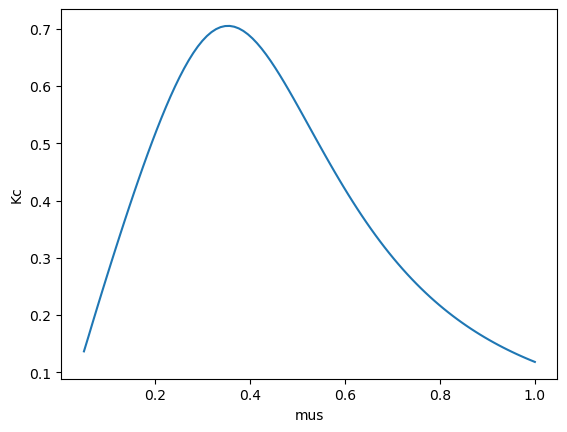

2*Tc= 0.1182899830593281
2*Winf= 0.13673090978359406
EDC= 0.3867001932856775


In [17]:
t = 1
Us = [1]
dns = [.1]
mus = np.linspace(.05,1,100)

lammus = 1/mus**2

colors = ['blue','red','purple','black','green']
linestyles = ['--','-']
all_lines = []
for i,dn in enumerate(dns):
    n1 = (2-dn)
    for j,U in enumerate(Us):
        EHX = hub.E_HX(n1,U)
        EH = hub.E_H(n1,U)
        print(EHX)
        Kcs = []
        for k,mu in enumerate(mus):
            if k%100==0:
                print(k)
            intlams = np.linspace(0.00001,lammus[k],100)
            
            Wintlams = hub.hub_Uc_lams(t,intlams,U,dn,EHX)
            
            Kcs.append((2*mu*simps(Wintlams-Wintlams[-1],intlams)))
            
        plt.plot(mus,Kcs)

EDC = simps(Kcs,mus)
plt.xlabel('mus')
plt.ylabel('Kc')
plt.show()
print('2*Tc=',Kcs[-1])
print('2*Winf=',Kcs[0])
print('EDC=',EDC)

-0.10000000000000009
Tc= 0.05914619375286234


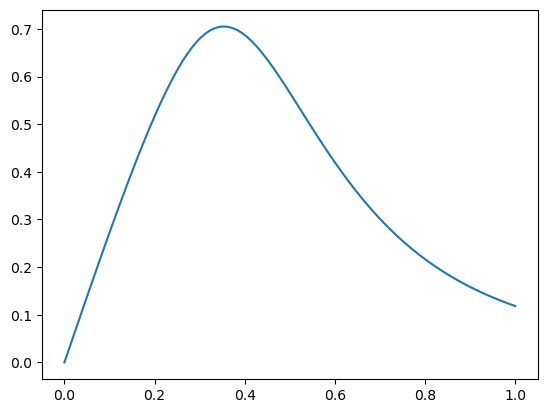

2*Tc= 0.11829238750572468
mu=1 val: 0.11829238750572468
mu= 0.0 val: 0.0
Ts= -1.997498435543818
U= 1.0025
EDC= 0.3901726793246446
Vext= -0.008453878713910528
USC= 0.0500000000959238
Winf= -0.9524999999040762
Wcinf= -0.45124999990407616
calculated energy= -1.56577963483716
Exact energy= -1.5657796337617382


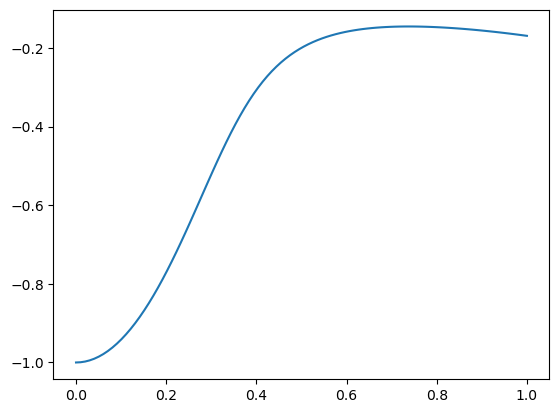

In [18]:
mus = np.linspace(0,1,100)
Kmus = np.empty(len(mus))

U = 1

t = 1
n1 = 1.05
n2 = 2-n1
target_dn = n2-n1
print(target_dn)

UH = ((U/2)*(n1**2+n2**2))
UHX = (U/2)*(1+(target_dn/2)**2)
#UH = hub.E_HX(n1,U)

Ts = hub.Ts(n1,t)
dvs = []


for i,mu in enumerate(mus):
    func = hub.dn_search_func_gen(U,mu**2*t,target_dn)
    #y = []
    #x = np.linspace(-100,100,20)
    #for p in x:
    #    y.append(func(p))
    #plt.plot(x,y)
    #plt.show()
    dv = optimize.bisect(func,-100000,100000)
    dvs.append(dv)
    
    T_op = hub.hub_kin_operator(t)
    
    eig, vec = hub.hub_2site(U,mu**2*t,dv)
    
    #print(np.dot(vec.T,np.dot(T_op,vec)))
    #print(Ts)
    
    T = np.dot(vec.T,np.dot(T_op,vec))
    #Kmus[i] = 2*mu*T-Ts
    Kmus[i] = (2*mu*(T-Ts))
    #Kmus[i] = (T-Ts)
    #Kmus[i] = T
    
    if mu == 1:
        Tc = T-Ts
        print('Tc=',Tc)
    

EDC = simps(Kmus,mus)
#print(EDC)
plt.plot(mus,Kmus)
plt.show()

print('2*Tc=',2*Tc)
print('mu=1 val:',Kmus[-1])
print('mu=',mus[0], 'val:',Kmus[0])
print('Ts=',Ts)
print('U=',UH)
print('EDC=',EDC)

lam = 1
func = hub.dn_search_func_gen(lam*U,t,target_dn)
dv = optimize.bisect(func,-1000000,1000000)
eig,vec = hub.hub_2site(lam*U,t,dv)

Vext_op = hub.hub_pot_operator(dv)
Vext = np.dot(vec.T,np.dot(Vext_op,vec))
print('Vext=',Vext)

lam = 100000
func = hub.dn_search_func_gen(lam*U,t,target_dn)
dv = optimize.bisect(func,-100000000000,100000000000)
eiglam,veclam = hub.hub_2site(lam*U,t,dv)

Vee_op = hub.hub_int_operator(U)
VSC = np.dot(veclam.T,np.dot(Vee_op,veclam))
print('USC=',VSC)
print('Winf=',VSC-UH)
print('Wcinf=',VSC-UHX)


print('calculated energy=',VSC+Ts+EDC+Vext)
print('Exact energy=',eig)

plt.plot(mus,dvs)
plt.show()

10.1
USC= 1.0000000000000009
USC-UH= -9.099999999999998
Winf exact= -9.1
0.9999999999999998
5% convergence lambda: 0.21018018018018017


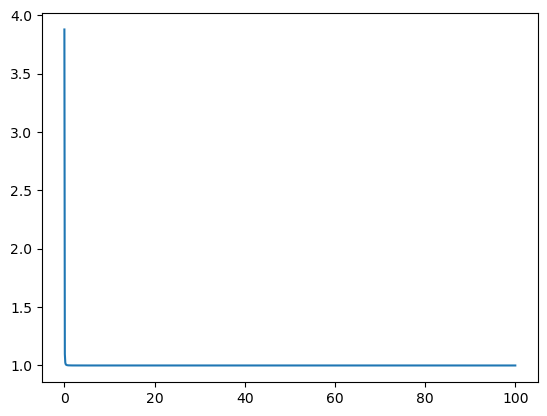

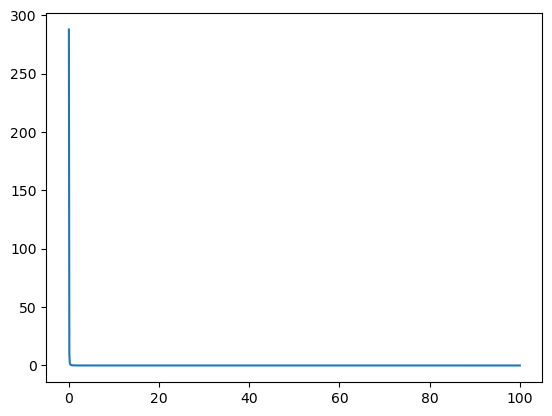

In [19]:
lams = np.linspace(.01,100,1000)

t = .1
n1 = 1.1
n2 = 2-n1
target_dn = (2-n1)-n1
U = 10
USC = np.abs(target_dn/2)*U
Winf_exact = -(U/4)*(4+target_dn**2-2*np.abs(target_dn))
UH = ((U/2)*(n1**2+n2**2))
print(UH)
print('USC=',USC)
print('USC-UH=',USC-UH)
print("Winf exact=",Winf_exact)
print((USC-UH)/Winf_exact)

Vees = []
errors = []
err_check = False

for lam in lams:

    func = hub.dn_search_func_gen(lam*U,t,target_dn)
    dv = optimize.bisect(func,-10000000,100000000)
    eig,vec = hub.hub_2site(lam*U,t,dv)

    Vee_op = hub.hub_int_operator(U)
    Vee = np.dot(vec.T,np.dot(Vee_op,vec))
    Vees.append(Vee)
    
    error = (Vee-USC)/USC*100
    
    if (error < 5) and (err_check==False):
        conv = lam
        err_check = True
        
    errors.append(error)

print('5% convergence lambda:',conv)
plt.plot(lams,Vees)
plt.show()
plt.plot(lams,errors)
plt.show()

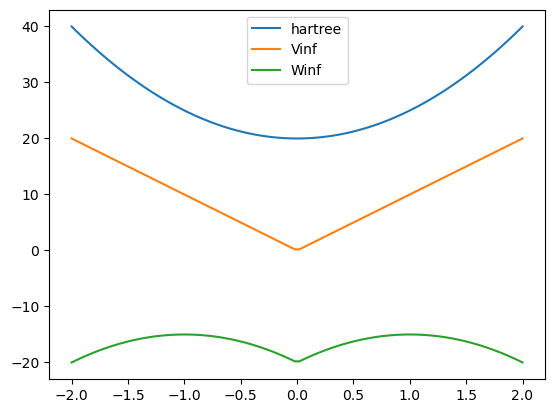

In [20]:
def hart(U,dn):
    return (U/4)*(4+dn**2)

def VSC(U,dn):
    return U*np.abs(dn/2)

dns = np.linspace(-2,2,100)
n1 = np.linspace(0,2,100)
n2 = 2-n1
dns = n2-n1

U = 20
UH = ((U/2)*(n1**2+n2**2))
EHX = (U/4)*(n1**2+n2**2)
harts = hart(U,dns)
VSCs = VSC(U,dns)

plt.plot(dns,harts,label='hartree')
plt.plot(dns,VSCs,label='Vinf')
plt.plot(dns,(VSCs-harts),label='Winf')
plt.legend()
plt.show()

I know the analytical limit for USC. I know the eqution for the Hartree energy. From this I can calculate Winf exactly. Winf should be negative in all cases for all U. \
How does the upside down adiabatic curve go to 2*Winf on the positive side? Why doe my upside down adiabatic curve continue to go to zero for both cases? \
Will adding more realistic interaction correct this? Are certain terms canceling in the Hubbard dimer?

USC= 0.050000000000000044
Winf= -0.9524999999999999


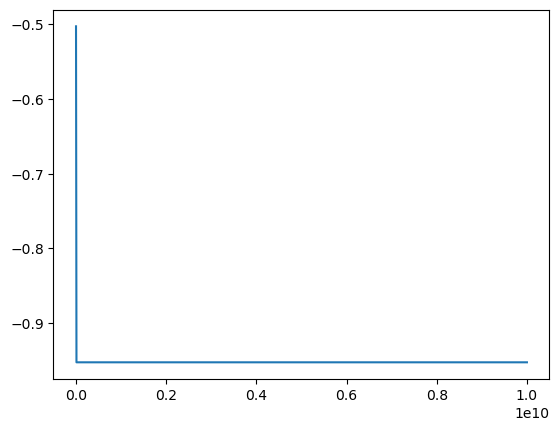

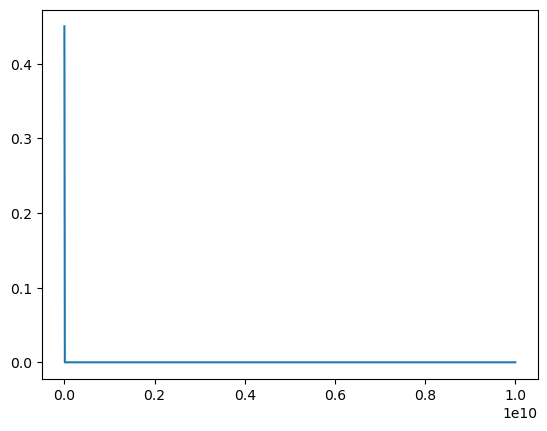

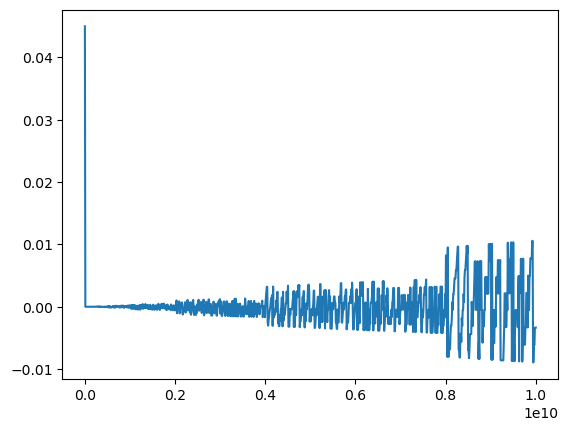

In [21]:
lams = np.linspace(.01,10000000000,1000)

t = 1
n1 = 1.05
n2 = 2-n1
target_dn = (2-n1)-n1
U = 1
USC = np.abs(target_dn/2)*U
UH = ((U/2)*(n1**2+n2**2))
Winf = USC-UH

print('USC=',USC)
print('Winf=',Winf)

Ws = []

for lam in lams:

    func = hub.dn_search_func_gen(lam*U,t,target_dn)
    dv = optimize.bisect(func,-1000000000000000000000,100000000000000000000,maxiter=1000)
    eig,vec = hub.hub_2site(lam*U,t,dv)

    Vee_op = hub.hub_int_operator(U)
    Vee = np.dot(vec.T,np.dot(Vee_op,vec))
    Ws.append(Vee-UH)

plt.plot(lams,Ws)
plt.show()

Wps = np.sqrt(lams)*(Ws-Winf)
plt.plot(lams,Ws-Winf)
plt.show()
plt.plot(lams,Wps)
plt.show()

trying l'hopitals rule

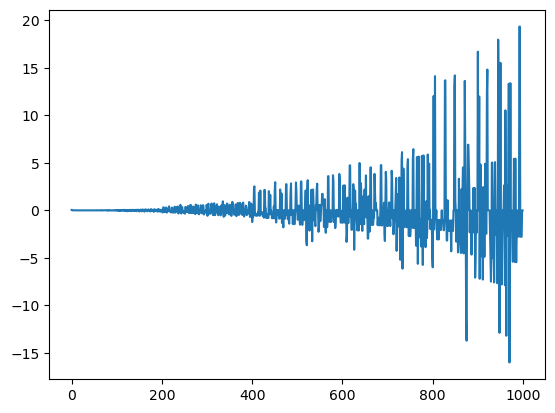

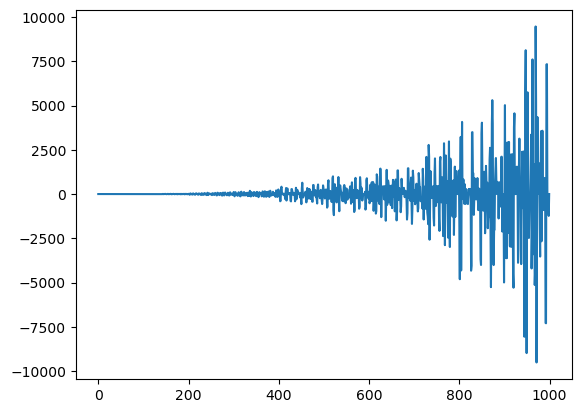

In [22]:
g = 1/np.sqrt(lams)
f = Ws-Winf

fp = np.gradient(f,lams)
gp = np.gradient(g,lams)

lhrule = fp/gp
plt.plot(lhrule)
plt.show()

fpp = np.gradient(fp,lams)
gpp = np.gradient(gp,lams)

lhrule2 = fpp/gpp
plt.plot(lhrule2)
plt.show()

The Hubbard dimer would have a single non-trivial co-motion function? \
equation 1.70 and that section may also be useful in Sara's thesis. \
change the form of the equation for W' into a more amenable form for L'Hopitals rule. https://en.wikipedia.org/wiki/Indeterminate_form#List_of_indeterminate_forms. \
Is equation 3.47 of Sara's thesis an argument for the non-existence of W'? \
Try extracting W' from the ISI equations on page 63 and 64. \

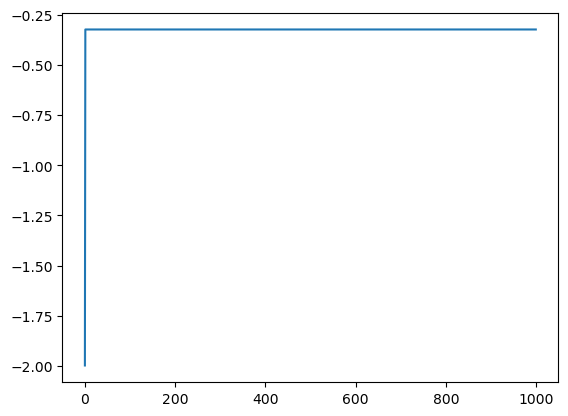

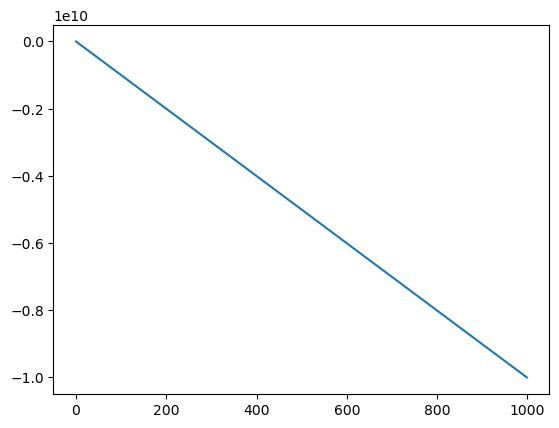

In [23]:
lams = np.linspace(.01,10000000000,1000)

t = 1
n1 = 1.05
n2 = 2-n1
target_dn = (2-n1)-n1
U = 1
eigs = []
dvs = []
for lam in lams:

    func = hub.dn_search_func_gen(lam*U,t,target_dn)
    dv = optimize.bisect(func,-1000000000000000000000,100000000000000000000,maxiter=1000)
    eig,vec = hub.hub_2site(lam*U,t,dv)
    eigs.append(eig)
    dvs.append(dv)
    
plt.plot(eigs)
plt.show()
plt.plot(dvs)
plt.show()


Tc= -1.9539925233402755e-13


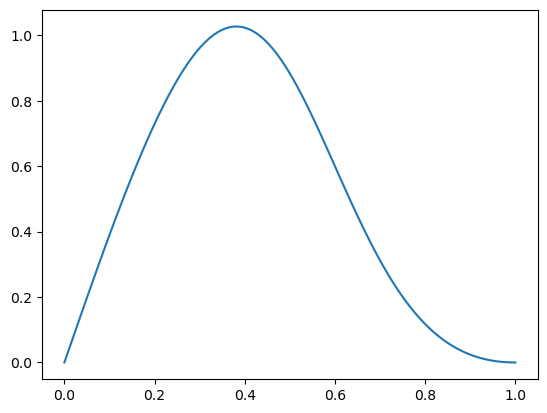

2*Tc= -3.907985046680551e-13
mu=1 val: -3.907985046680551e-13
mu= 1e-05 val: 3.9799497476284386e-05
Ts= -1.98997487421324
U= 1.01
EDC= 0.507632238660428
Vext= -0.010050378152325807
USC= 1.4950000001471817
Winf= 0.4850000001471817
Wcinf= 0.9900000001471817
calculated energy= 0.0026069864420439175
Exact energy= -0.00503781525907861


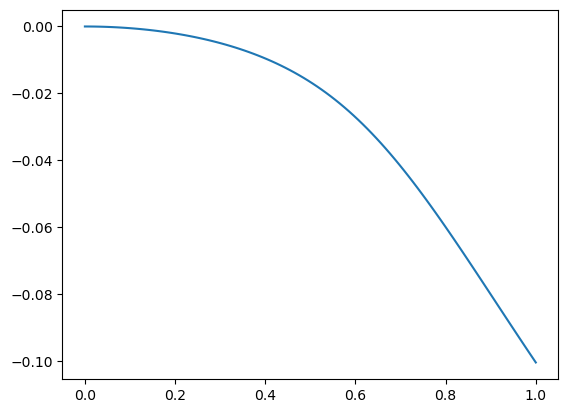

In [24]:
mus = np.linspace(0.00001,1,100)
Kmus = np.empty(len(mus))

U = 1

t = 1
d= .5
n1 = 1.1
n2 = 2-n1
target_dn = n2-n1

UH = ((U/2)*(n1**2+n2**2))
UHX = (U/2)*(1+(target_dn/2)**2)
#UH = hub.E_HX(n1,U)

Ts = near.Ts(n1,t)
dvs = []


for i,mu in enumerate(mus):
    func = near.dn_search_func_gen(U,mu**2*t,d,target_dn)
    #y = []
    #x = np.linspace(-100,100,20)
    #for p in x:
    #    y.append(func(p))
    #plt.plot(x,y)
    #plt.show()
    dv = optimize.bisect(func,-10000000000,10000000000)
    dvs.append(dv)
    
    T_op = near.hub_kin_operator(t)
    
    eig, vec = near.hub_2site(U,mu**2*t,d,dv)
    
    #print(np.dot(vec.T,np.dot(T_op,vec)))
    #print(Ts)
    
    T = np.dot(vec.T,np.dot(T_op,vec))
    #Kmus[i] = 2*mu*T-Ts
    Kmus[i] = (2*mu*(T-Ts))
    #Kmus[i] = (T-Ts)
    #Kmus[i] = T
    
    if mu == 1:
        Tc = T-Ts
        print('Tc=',Tc)
    

EDC = simps(Kmus,mus)
#print(EDC)
plt.plot(mus,Kmus)
plt.show()

print('2*Tc=',2*Tc)
print('mu=1 val:',Kmus[-1])
print('mu=',mus[0], 'val:',Kmus[0])
print('Ts=',Ts)
print('U=',UH)
print('EDC=',EDC)

lam = 1
func = near.dn_search_func_gen(lam*U,t,d,target_dn)
dv = optimize.bisect(func,-1000000,1000000)
eig,vec = near.hub_2site(lam*U,t,d,dv)

Vext_op = near.hub_pot_operator(dv)
Vext = np.dot(vec.T,np.dot(Vext_op,vec))
print('Vext=',Vext)

lam = 1000000
func = near.dn_search_func_gen(lam*U,t,d,target_dn)
dv = optimize.bisect(func,-100000000000,100000000000)
eiglam,veclam = near.hub_2site(lam*U,t,d,dv)

Vee_op = near.hub_int_operator(U,d)
VSC = np.dot(veclam.T,np.dot(Vee_op,veclam))
print('USC=',VSC)
print('Winf=',VSC-UH)
print('Wcinf=',VSC-UHX)


print('calculated energy=',VSC+Ts+EDC+Vext)
print('Exact energy=',eig)

plt.plot(mus,dvs)
plt.show()

ref 117, 34, 72, 74, 80  in Sara's Thesis might be helpful. \

In [17]:
from decimal import Decimal

In [30]:
n = Decimal(1000000)

In [31]:
np.exp(n)

Decimal('3.033215396802087545086402141E+434294')

In [46]:
t = [1000,2000]
t = np.array([Decimal(a) for a in t])
np.exp(t)

array([Decimal('1.970071114017046993888879352E+434'),
       Decimal('3.881180194284368576482322075E+868')], dtype=object)

In [2]:
import

In [7]:
g = decimal.Decimal(10)

In [8]:
g.ln()

Decimal('2.302585092994045684017991455')